# 📊 Análisis de Mortalidad en Argentina (2019-2022): Tendencias, Impacto y Desafíos en Salud Pública ⚕️
---

El análisis de datos de defunciones en Argentina es crucial para comprender las tendencias de mortalidad y sus determinantes. Este estudio busca identificar patrones y factores asociados a las muertes, proporcionando información valiosa para:

🔹 Formulación de políticas públicas 🏛️

🔹 Planificación de recursos sanitarios 🏨

🔹 Desarrollo de estrategias preventivas 🛑


👥 Audiencia beneficiada:

🔹 Profesionales de la salud 🩺

🔹 Investigadores 🔬

🔹 Responsables de políticas públicas 🏛️

🔹 ONGs enfocadas en salud pública 💚

---

Preguntas e Hipótesis a Responder❓

🔎 Causas y tendencias:

- ¿Cuáles son las principales causas de muerte en Argentina y cómo han evolucionado entre 2015 y 2022?

📍 Geografía y desigualdad:

- ¿Existen diferencias significativas en la mortalidad por provincias o regiones?


⚧ Género y edad:

- ¿Cómo varían las tasas de mortalidad según el sexo y los grupos etarios?


🌦 Factores temporales:

- ¿Se observan tendencias estacionales en las defunciones mensuales?


🦠 Impacto del COVID-19:

- ¿Qué efecto tuvo la pandemia en la mortalidad general y en las causas de muerte durante 2020 y 2021?


💰 Factores socioeconómicos:

- ¿Existen correlaciones entre variables socioeconómicas y la mortalidad en diferentes regiones?

## DATA WRANGLING 🧹

📌 Empezamos importando las librerías necesarias, y subiendo el DataSet original, para luego hacer las modificaciones pertinentes.

In [ ]:
# Importación de Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lectura del DataSet original

df = pd.read_csv('http://datos.salud.gob.ar/dataset/c1643775-18e1-40fd-9e7f-0cebb5b1abe6/resource/5b21a088-3c04-4fdd-8741-82ab6add2730/download/arg_def_m_15_22.csv')

In [ ]:
# Se muestran encabezados para comprobar la carga correcta

print (df.head())

     region jurisdiccion mes_anio_defuncion  mes_def  anio_def  sexo_id  \
0  1.Centro       2.CABA            07/2015        7      2015        1   
1  1.Centro       2.CABA            10/2015       10      2015        1   
2  1.Centro       2.CABA            12/2015       12      2015        1   
3  1.Centro       2.CABA            01/2015        1      2015        1   
4  1.Centro       2.CABA            06/2015        6      2015        1   

  sexo_nombre           grupo_etario  \
0   masculino  07. de 80 anios y mas   
1   masculino  07. de 80 anios y mas   
2   masculino    06.de 70 a 79 anios   
3   masculino  07. de 80 anios y mas   
4   masculino  07. de 80 anios y mas   

                   grupo_causa_defuncion_CIE10 cod_causa_muerte_CIE10  \
0  0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                    A04   
1  0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                    A04   
2  0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                    A09   
3  0100 CIERTAS 

In [ ]:
# Se cuenta la cantidad de registros que tiene el DataSed original

registros_df = df.shape [0]
print (f'Cantidad de registros: {registros_df}')

Cantidad de registros: 1969274


📌 Teniendo en cuenta que la cantidad de registros es muy alta (2 millones aprox) se decidió, a fines practicos, reducir el DataSet a una cantidad menor. Por lo que se aplicaron filtros para tomar datos solo del rango 2019-2022. Esto reduce los registros practicamente a la mitad, haciendo el analisis mas eficiente, considerando además que a pesar de esta reducción no se pierde el enfoque.

In [ ]:
# Se crea un nuevo DataFrame a partir de un filtro

df_filtrado = df[df['anio_def'] >= 2019]

In [ ]:
# Se muestra para comprobar los cambios

print (df_filtrado.head())

        region jurisdiccion mes_anio_defuncion  mes_def  anio_def  sexo_id  \
62413  6.Cuyo1  50.Mendoza.            06/2019        6      2019        1   
62414  6.Cuyo1  50.Mendoza.            06/2019        6      2019        1   
62415  6.Cuyo1  50.Mendoza.            04/2019        4      2019        1   
62416  6.Cuyo1  50.Mendoza.            07/2019        7      2019        1   
62417  6.Cuyo1  50.Mendoza.            10/2019       10      2019        1   

      sexo_nombre           grupo_etario grupo_causa_defuncion_CIE10  \
62413   masculino  07. de 80 anios y mas      0300 DIABETES MELLITUS   
62414   masculino  07. de 80 anios y mas      0300 DIABETES MELLITUS   
62415   masculino    03.de 40 a 49 anios      0300 DIABETES MELLITUS   
62416   masculino    04.de 50 a 59 anios      0300 DIABETES MELLITUS   
62417   masculino    04.de 50 a 59 anios      0300 DIABETES MELLITUS   

      cod_causa_muerte_CIE10  cantidad  
62413                    E14         1  
62414           

In [ ]:
# Se vuelven a contar la cantidad de registros

registros_df_filtrado = df_filtrado.shape [0]
print (f'Cantidad de registros: {registros_df_filtrado}')

Cantidad de registros: 1001356


📌 Asignamos un nuevo nombre al DataFrame, colocando el nombre 'defunciones' que se considera más adecuado. Además modificamos los nombres de las columnas para mejorar la interpretación.

In [ ]:
# Se asigna un nuevo nombre al DataFrame

defunciones = df_filtrado

In [ ]:
# Se muestran los nombres de las columnas
defunciones.columns

Index(['region', 'jurisdiccion', 'mes_anio_defuncion', 'mes_def', 'anio_def',
       'sexo_id', 'sexo_nombre', 'grupo_etario', 'grupo_causa_defuncion_CIE10',
       'cod_causa_muerte_CIE10', 'cantidad'],
      dtype='object')

In [ ]:
# Se modifican los nombres de las columnas

defunciones.columns = ["Region", "Jurisdiccion", "Mes_año", "Mes", "Año", "Sexo_ID", "Sexo", "Grupo_Etario", "Clasificacion", "Causa_CIE10", "Cantidad"]
print (defunciones.head())

        Region Jurisdiccion  Mes_año  Mes   Año  Sexo_ID       Sexo  \
62413  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
62414  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
62415  6.Cuyo1  50.Mendoza.  04/2019    4  2019        1  masculino   
62416  6.Cuyo1  50.Mendoza.  07/2019    7  2019        1  masculino   
62417  6.Cuyo1  50.Mendoza.  10/2019   10  2019        1  masculino   

                Grupo_Etario           Clasificacion Causa_CIE10  Cantidad  
62413  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1  
62414  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1  
62415    03.de 40 a 49 anios  0300 DIABETES MELLITUS         E14         1  
62416    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1  
62417    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1  


📌 Cómo en el DataSet original tenemos una columna con el Codigo de Causa de Defuncion, lo cual visto solo como codigo no es relevante. Decidí buscar en otra fuente a que refiere cada código para poder sumar este Dato al análisis. La búsqueda resultó satisfactoria y ahora puedo vincular el Codigo de Causa de Muerte a una Descripción para entender mejor cual fue realmente la Causa de Defunción en cada caso.

In [ ]:
# Se importa la función files.upload() de google.colab
from google.colab import files

# Se solicita al usuario que suba el archivo CIE_10.xlsx, (está en el repositorio Github)
uploaded = files.upload()

# Se verifica que el archivo fue subido y se lee con pandas
if 'CIE_10.xlsx' in uploaded:
    import pandas as pd
    # Se lee el archivo Excel directamente desde el contenido subido
    causas = pd.read_excel('CIE_10.xlsx', engine='openpyxl')
    print("Archivo 'CIE_10.xlsx' subido y leído con éxito.")
    print(causas.head())
else:
    print("Error: El archivo 'CIE_10.xlsx' no fue subido.")
    # Puedes agregar aquí un manejo de error adicional si el archivo no se sube

Saving CIE_10.xlsx to CIE_10.xlsx
Archivo 'CIE_10.xlsx' subido y leído con éxito.
  Clasificación Internacional de Enfermedades 10° CIE 10° REVISION Unnamed: 1
0  Definición:\nUna clasificación de enfermedades...                      NaN
1                                                NaN                      NaN
2  Afección o códigos principal:\nSe   define   c...                      NaN
3                                            CAPITUL                      O I
4    CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS                      NaN


In [ ]:
# Se muestran las columnas del nuevo archivo subido
causas.columns

Index(['Clasificación Internacional de Enfermedades 10° CIE 10° REVISION', 'Unnamed: 1'], dtype='object')

In [ ]:
# Se modifican las columnas con nombres adecuados para poder unir con el DataFrame
causas.columns = ["Causa_CIE10", "Descripcion"]
print (causas.head())

                                         Causa_CIE10 Descripcion
0  Definición:\nUna clasificación de enfermedades...         NaN
1                                                NaN         NaN
2  Afección o códigos principal:\nSe   define   c...         NaN
3                                            CAPITUL         O I
4    CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS         NaN


📌 Una vez subida la nueva fuente de Datos, hacemos el MERGE con el DataFrame Defunciones para, ahora sí, tener la información completa!

In [ ]:
# Se ejecuta el MERGE para unir la columna que nos interesa del nuevo archivo subido
defunciones = defunciones.merge(causas, on="Causa_CIE10", how="left")

print(defunciones.head())

    Region Jurisdiccion  Mes_año  Mes   Año  Sexo_ID       Sexo  \
0  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
1  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
2  6.Cuyo1  50.Mendoza.  04/2019    4  2019        1  masculino   
3  6.Cuyo1  50.Mendoza.  07/2019    7  2019        1  masculino   
4  6.Cuyo1  50.Mendoza.  10/2019   10  2019        1  masculino   

            Grupo_Etario           Clasificacion Causa_CIE10  Cantidad  \
0  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
1  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
2    03.de 40 a 49 anios  0300 DIABETES MELLITUS         E14         1   
3    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   
4    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   

                          Descripcion  
0  Diabetes mellitus, no especificada  
1  Diabetes mellitus, no especificada  
2  Diabetes mellitus, no especif

In [ ]:
# Se muestran (sin duplicados) los valores de Region
print(defunciones['Region'].unique())


['6.Cuyo1' '7.Cuyo2.' '8.Pat. Norte.' '1.Centro' '5.NOA2.' '9.Pat.Sur.'
 '2.NEA.' '3.NOA1.' '4.NOA.' '10.sin especificar.']


In [ ]:
# Se renombran estos datos para unificar categorías que aparecían duplicadas.
defunciones['Region'] = defunciones['Region'].replace({
    '1.Centro': 'Centro',
    '2.NEA.': 'NEA',
    '6.Cuyo1' : 'Cuyo',
    '7.Cuyo2.' : 'Cuyo',
    '8.Pat. Norte.' : 'Patagonia',
    '5.NOA2.' : 'NOA',
    '9.Pat.Sur.' : 'Patagonia',
    '3.NOA1.' : 'NOA',
    '4.NOA.' : 'NOA',
    '10.sin especificar.' : 'Sin especificar',
})

In [ ]:
# Una vez terminadas las modiciaciones del DataFrame, lo exportamos en formato CSV para almacenar una copia.

ruta_salida = "defunciones_resultado.csv"
defunciones.to_csv(ruta_salida, index=False, encoding="utf-8")


from google.colab import files
files.download(ruta_salida)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA - Analisis Exploratorio de Datos

In [ ]:
# @title
# Mostrar información general
defunciones.info()
print("\nResumen estadístico:")
print(defunciones.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001356 entries, 0 to 1001355
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Region         1001356 non-null  object
 1   Jurisdiccion   1001356 non-null  object
 2   Mes_año        1001356 non-null  object
 3   Mes            1001356 non-null  int64 
 4   Año            1001356 non-null  int64 
 5   Sexo_ID        1001356 non-null  int64 
 6   Sexo           1001356 non-null  object
 7   Grupo_Etario   1001356 non-null  object
 8   Clasificacion  1001356 non-null  object
 9   Causa_CIE10    1001356 non-null  object
 10  Cantidad       1001356 non-null  int64 
 11  Descripcion    960103 non-null   object
dtypes: int64(4), object(8)
memory usage: 91.7+ MB

Resumen estadístico:
                Mes           Año       Sexo_ID      Cantidad
count  1.001356e+06  1.001356e+06  1.001356e+06  1.001356e+06
mean   6.519160e+00  2.020532e+03  1.522033e+00  1.544767e+0

🔵 Defunciones por Año
---
📅 En este gráfico de barras se muestra la cantidad de defunciones registradas en cada año disponible en el dataset. Esto permite identificar tendencias generales y posibles anomalías, como aumentos significativos en ciertos períodos.

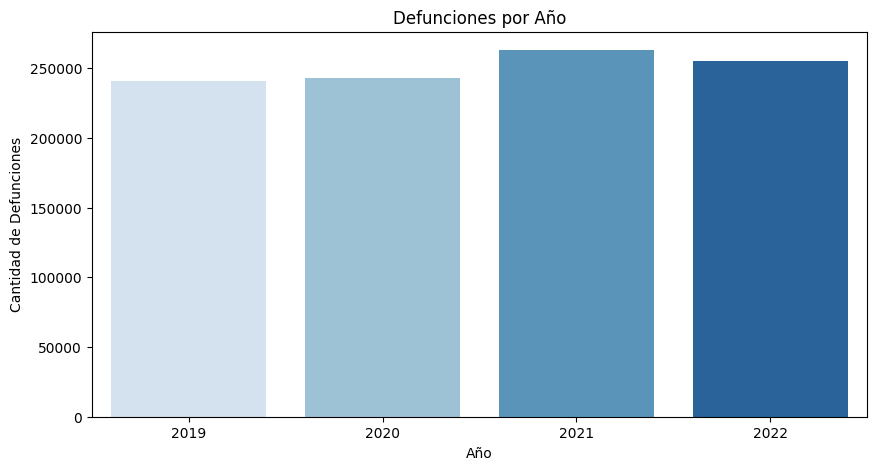

In [ ]:
# @title
# Defunciones por año
plt.figure(figsize=(10,5))
sns.barplot(x=defunciones['Año'].value_counts().index, y=defunciones['Año'].value_counts().values, palette="Blues")
plt.title("Defunciones por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Defunciones")
plt.show()

📈 Tendencia de Defunciones por Mes
---
📊 Se utilizó un gráfico de líneas para analizar la variación mensual de las defunciones. Esto ayuda a identificar patrones estacionales, como aumentos en invierno (debido a enfermedades respiratorias) o eventos extraordinarios como la pandemia.

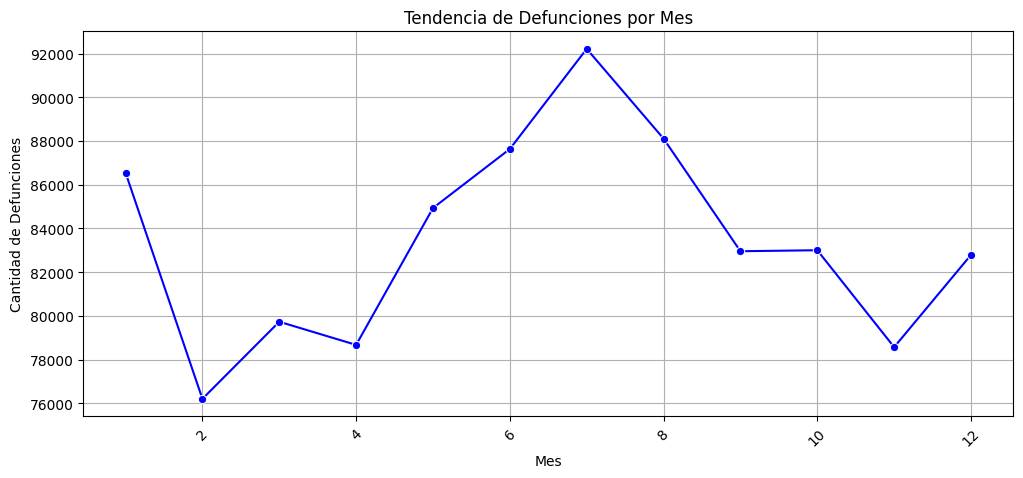

In [ ]:
# @title
# Defunciones por mes
defunciones_mes = defunciones['Mes'].value_counts().reset_index()
defunciones_mes.columns = ['Mes', 'Cantidad']
plt.figure(figsize=(12,5))
sns.lineplot(data=defunciones_mes, x='Mes', y='Cantidad', marker='o', linestyle='-', color='b')
plt.title("Tendencia de Defunciones por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Defunciones")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

🚻 Distribución de Defunciones por Género
---
📊 Se presenta un gráfico de torta para visualizar la proporción de defunciones según el género reportado (Masculino, Femenino, Indeterminado y Desconocido). Esto ayuda a evaluar si existen diferencias significativas entre géneros.

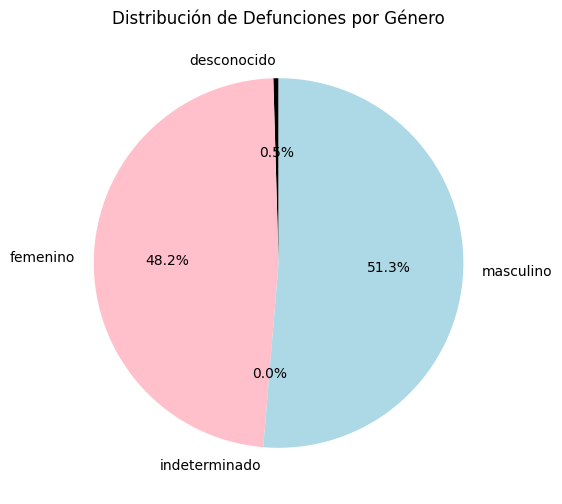

In [ ]:
# @title
# Análisis por género
gender_counts = defunciones.groupby('Sexo')['Cantidad'].sum()
plt.figure(figsize=(6,6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['black', 'pink', 'gray', 'lightblue'], startangle=90)
plt.title("Distribución de Defunciones por Género")
plt.ylabel("")
plt.show()

👶👵 Defunciones por Grupo Etario
---
📊 Un gráfico de barras muestra la cantidad de defunciones según el grupo etario. Esto permite entender qué franjas de edad tienen mayor mortalidad y detectar tendencias, como mayor riesgo en adultos mayores.

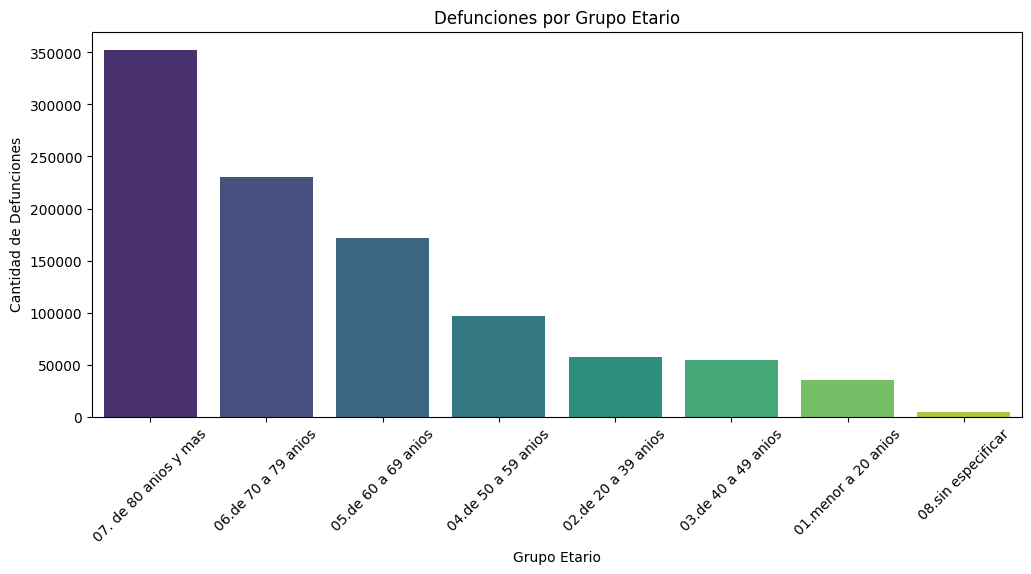

In [ ]:
# @title
# Defunciones por grupo etario
group_counts = defunciones['Grupo_Etario'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Defunciones por Grupo Etario")
plt.xlabel("Grupo Etario")
plt.ylabel("Cantidad de Defunciones")
plt.show()

⚕️ Principales Causas de Defunción
---
📊 Se presenta un gráfico de barras con las 10 principales causas de muerte según el código CIE-10. Este análisis permite identificar enfermedades o eventos con mayor impacto en la mortalidad.

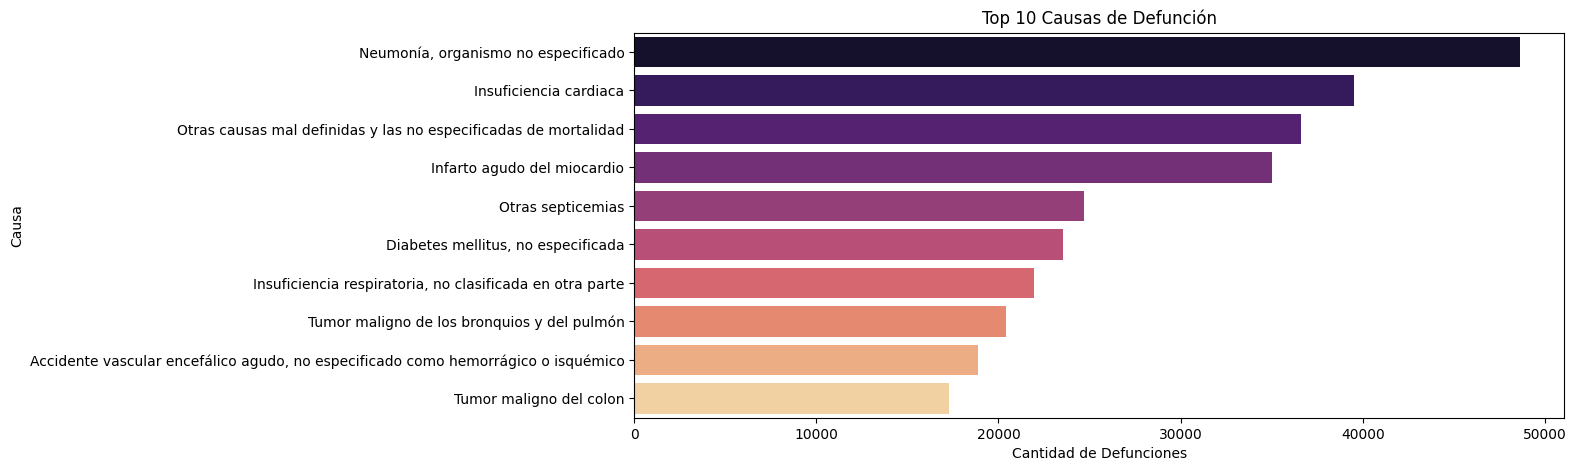

In [ ]:
# @title
# Principales causas de muerte
top_causas = defunciones['Descripcion'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(y=top_causas.index, x=top_causas.values, palette="magma")
plt.title("Top 10 Causas de Defunción")
plt.xlabel("Cantidad de Defunciones")
plt.ylabel("Causa")
plt.show()

🌍 Defunciones por Región
---
📊 Un gráfico de barras muestra la distribución de defunciones por región, permitiendo analizar desigualdades geográficas en la mortalidad y detectar zonas con mayor incidencia de fallecimientos.

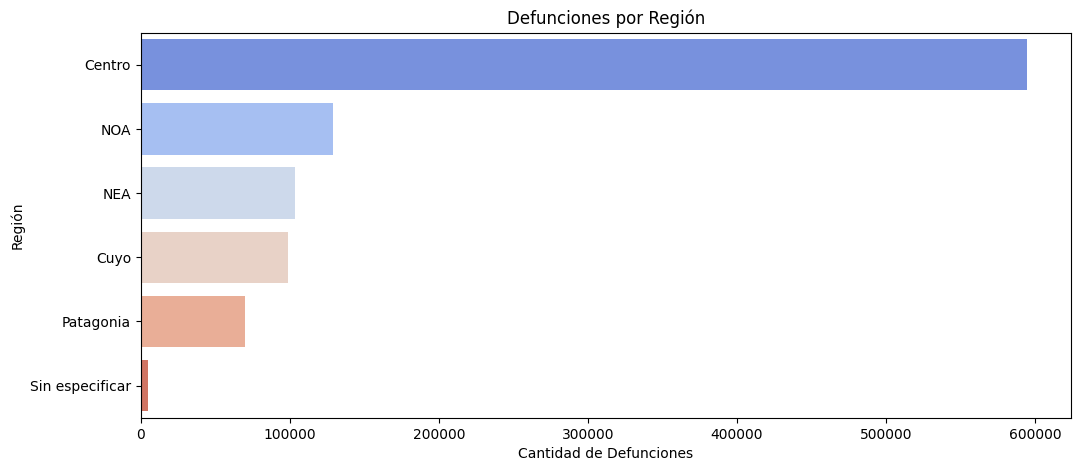

In [ ]:
# @title
# Defunciones por región
plt.figure(figsize=(12,5))
sns.barplot(y=defunciones['Region'].value_counts().index, x=defunciones['Region'].value_counts().values, palette="coolwarm")
plt.title("Defunciones por Región")
plt.xlabel("Cantidad de Defunciones")
plt.ylabel("Región")
plt.show()

🦠 Impacto de la Pandemia (2020-2021)
---
📈 Se utilizó un gráfico de líneas para comparar la cantidad de defunciones durante la pandemia de COVID-19 en 2020 y 2021. Esto ayuda a visualizar el impacto en términos de exceso de mortalidad durante esos años.

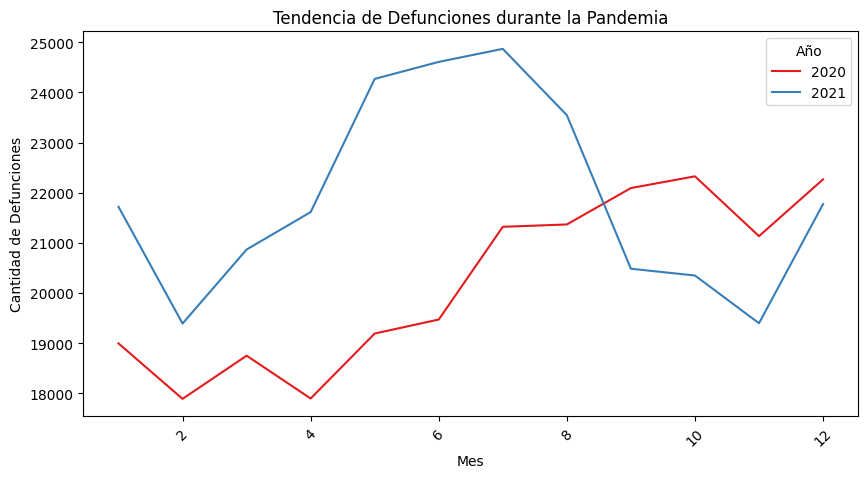

In [ ]:
# @title
# Impacto de la pandemia (2020-2021)
covid_years = defunciones[defunciones['Año'].isin([2020, 2021])]
covid_counts = covid_years.groupby(['Mes', 'Año']).size().reset_index(name='Cantidad')
plt.figure(figsize=(10,5))
sns.lineplot(data=covid_counts, x='Mes', y='Cantidad', hue='Año', palette="Set1")
plt.xticks(rotation=45)
plt.title("Tendencia de Defunciones durante la Pandemia")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Defunciones")
plt.show()

# Conclusiones del Análisis de Defunciones en Argentina

##📊 1. Tendencias Generales
El análisis de las defunciones a lo largo de los años muestra una variación en la cantidad de fallecimientos por distintos factores, entre ellos el impacto de la pandemia de COVID-19 (2020-2021), donde se observó un incremento significativo. Esta tendencia resalta la importancia de eventos sanitarios en la mortalidad general.

##👨‍👩‍👧‍👦 2. Diferencias por Género
Se identificó que las defunciones presentan diferencias según el género, siendo los valores más altos en hombres, seguidos por mujeres.

##🎂 3. Mortalidad por Grupo Etario
El análisis de las defunciones por grupos etarios confirma que las edades más avanzadas presentan la mayor cantidad de fallecimientos, lo cual es esperable debido a la relación natural entre edad y mortalidad. Sin embargo, es importante profundizar en las causas específicas de fallecimiento en ciertos grupos vulnerables, como los neonatos o jóvenes.

##⚠️ 4. Principales Causas de Muerte
El análisis de las principales causas de defunción revela que ciertas enfermedades no transmisibles, como problemas cardiovasculares y respiratorios, tienen un peso significativo en la mortalidad total. La identificación de estas causas es clave para diseñar políticas de salud pública más efectivas.

##📅 5. Estacionalidad y Patrones Temporales
Se observó que las defunciones presentan cierta estacionalidad, con picos en algunos meses del año. Esto puede estar relacionado con factores climáticos, brotes epidémicos o períodos de mayor vulnerabilidad en la población.



#Carga de Datos y Preparación Inicial

In [ ]:
import pandas as pd

df = pd.read_excel('defunciones_final.xlsx')

print("Primeras filas del DataFrame original:")
print(df.head())
print("\nInformación del DataFrame original:")
df.info()
print("\nEstadísticas descriptivas de 'Cantidad':")
print(df['Cantidad'].describe())

Primeras filas del DataFrame original:
  Region Jurisdiccion    Mes_año  Mes   Año  Sexo_ID       Sexo  \
0   Cuyo  50.Mendoza. 2019-06-01    6  2019        1  masculino   
1   Cuyo  50.Mendoza. 2019-06-01    6  2019        1  masculino   
2   Cuyo  50.Mendoza. 2019-04-01    4  2019        1  masculino   
3   Cuyo  50.Mendoza. 2019-07-01    7  2019        1  masculino   
4   Cuyo  50.Mendoza. 2019-10-01   10  2019        1  masculino   

            Grupo_Etario           Clasificacion Causa_CIE10  Cantidad  \
0  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
1  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
2    03.de 40 a 49 anios  0300 DIABETES MELLITUS         E14         1   
3    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   
4    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   

                          Descripcion  
0  Diabetes mellitus, no especificada  
1  Diabetes mellitus, no especifi

#Ingeniería de Atributos y Agregación

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# Para preprocesamiento
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder # ¡Aquí está la adición!
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder # Necesitarás instalar esta librería: pip install category_encoders

# Para modelos de regresión
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Para métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# ... el resto de tu código

print("Primeras filas del DataFrame original:")
print(df.head())
print("\nInformación del DataFrame original:")
df.info()
print("\nEstadísticas descriptivas de 'Cantidad':")
print(df['Cantidad'].describe())

Primeras filas del DataFrame original:
  Region Jurisdiccion    Mes_año  Mes   Año  Sexo_ID       Sexo  \
0   Cuyo  50.Mendoza. 2019-06-01    6  2019        1  masculino   
1   Cuyo  50.Mendoza. 2019-06-01    6  2019        1  masculino   
2   Cuyo  50.Mendoza. 2019-04-01    4  2019        1  masculino   
3   Cuyo  50.Mendoza. 2019-07-01    7  2019        1  masculino   
4   Cuyo  50.Mendoza. 2019-10-01   10  2019        1  masculino   

            Grupo_Etario           Clasificacion Causa_CIE10  Cantidad  \
0  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
1  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
2    03.de 40 a 49 anios  0300 DIABETES MELLITUS         E14         1   
3    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   
4    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   

                          Descripcion  
0  Diabetes mellitus, no especificada  
1  Diabetes mellitus, no especifi

In [ ]:
## 1. Copia del DataFrame para no modificar el original
df_processed = df.copy()

## 2. Manejo de Valores Nulos (usando asignación para evitar warnings con inplace=True)
print("\nValores nulos ANTES de imputación:")
print(df_processed.isnull().sum())

for column in df_processed.columns:
    if df_processed[column].isnull().any():
        if df_processed[column].dtype == 'object' or df_processed[column].dtype == 'category':
            mode_val = df_processed[column].mode()[0]
            df_processed[column] = df_processed[column].fillna(mode_val)
        elif df_processed[column].dtype in ['int64', 'float64']:
            mean_val = df_processed[column].mean()
            df_processed[column] = df_processed[column].fillna(mean_val)

print("\nValores nulos DESPUÉS de imputación:")
print(df_processed.isnull().sum())

## 3. Conversión de tipos de datos si es necesario
df_processed['Cantidad'] = pd.to_numeric(df_processed['Cantidad'], errors='coerce').fillna(df_processed['Cantidad'].mean())


## 4. Ingeniería de Atributos - Extracción de información temporal
df_processed['Fecha_Completa'] = pd.to_datetime(df_processed['Año'].astype(str) + '-' + df_processed['Mes'].astype(str) + '-01')

df_processed['Dia_del_Año'] = df_processed['Fecha_Completa'].dt.dayofyear
df_processed['Dia_de_la_Semana'] = df_processed['Fecha_Completa'].dt.dayofweek
df_processed['Trimestre'] = df_processed['Fecha_Completa'].dt.quarter

def get_season(month):
    if month in [12, 1, 2]: return 'Verano'
    elif month in [3, 4, 5]: return 'Otoño'
    elif month in [6, 7, 8]: return 'Invierno'
    else: return 'Primavera'
df_processed['Estacion'] = df_processed['Mes'].apply(get_season)


## 5. Agregación de Datos: La clave de la granularidad y la eficiencia
# Prediciremos la cantidad de defunciones por Región, Mes, Año, Sexo y Grupo Etario
# Podemos añadir más columnas si la precisión lo requiere, pero menos columnas = más eficiencia.
grouping_cols = [
    'Region', 'Jurisdiccion', 'Mes', 'Año', 'Sexo', # Eliminamos Sexo_ID por redundancia
    'Grupo_Etario', 'Clasificacion', 'Causa_CIE10',
    'Dia_del_Año', 'Dia_de_la_Semana', 'Trimestre', 'Estacion'
]

# Sumamos la 'Cantidad' para cada combinación única de las columnas de agrupamiento
df_agg = df_processed.groupby(grouping_cols).agg(
    Total_Cantidad=('Cantidad', 'sum')
).reset_index()

df_agg.rename(columns={'Total_Cantidad': 'Cantidad_Total'}, inplace=True)

print("\nDataFrame después de la Agregación (primeras filas):")
print(df_agg.head())
print("\nInformación del DataFrame Agregado:")
df_agg.info()
print(f"Número de filas después de la agregación: {len(df_agg)}")


Valores nulos ANTES de imputación:
Region               0
Jurisdiccion         0
Mes_año              0
Mes                  0
Año                  0
Sexo_ID              0
Sexo                 0
Grupo_Etario         0
Clasificacion        0
Causa_CIE10          0
Cantidad             0
Descripcion      41253
dtype: int64

Valores nulos DESPUÉS de imputación:
Region           0
Jurisdiccion     0
Mes_año          0
Mes              0
Año              0
Sexo_ID          0
Sexo             0
Grupo_Etario     0
Clasificacion    0
Causa_CIE10      0
Cantidad         0
Descripcion      0
dtype: int64

DataFrame después de la Agregación (primeras filas):
   Region Jurisdiccion  Mes   Año      Sexo         Grupo_Etario  \
0  Centro  14.Cordoba.    1  2019  femenino  01.menor a 20 anios   
1  Centro  14.Cordoba.    1  2019  femenino  01.menor a 20 anios   
2  Centro  14.Cordoba.    1  2019  femenino  01.menor a 20 anios   
3  Centro  14.Cordoba.    1  2019  femenino  01.menor a 20 anios   
4 

In [10]:
## 1. Separar características (X) y variable objetivo (y)
TARGET_COLUMN_REGRESSION = 'Cantidad_Total'

X = df_agg.drop(columns=[TARGET_COLUMN_REGRESSION])
y = df_agg[TARGET_COLUMN_REGRESSION]

print(f"\nVariables predictoras (X) después de agregación: {X.columns.tolist()}")
print(f"Variable objetivo (y): {TARGET_COLUMN_REGRESSION}")


## 2. Definir columnas para el preprocesamiento
# Numéricas (para estandarización)
numerical_features = ['Mes', 'Año', 'Dia_del_Año', 'Dia_de_la_Semana', 'Trimestre']

# Categóricas para Target Encoding (alta cardinalidad)
# Estas se transformarán en una sola columna numérica
categorical_target_encode_features = ['Jurisdiccion', 'Clasificacion', 'Causa_CIE10']

# Categóricas para One-Hot Encoding (baja cardinalidad, si las hubiera y fueran nominales)

categorical_ohe_features = ['Region', 'Sexo', 'Estacion']

# Ordinal Encoding para 'Grupo_Etario'
categorical_ordinal_features = ['Grupo_Etario']


grupo_etario_orden = [
    '01.menor a 20 anios',
    '02.de 20 a 39 anios',
    '03.de 40 a 49 anios',
    '04.de 50 a 59 anios',
    '05.de 60 a 69 anios',
    '06.de 70 a 79 anios',
    '07. de 80 anios y mas',
    '08.sin especificar'
]
# Filtrar para evitar KeyError si alguna categoría no está en X_train
grupo_etario_orden_final = [cat for cat in grupo_etario_orden if cat in df_agg['Grupo_Etario'].unique()]


## 3. División de datos en conjuntos de entrenamiento y prueba
# Para series temporales se usaría TimeSeriesSplit, pero para un ejemplo general, train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


## 4. Crear el Pipeline de Preprocesamiento y Modelos

# Preprocesador: Aplicará diferentes transformaciones a diferentes columnas
# Usaremos TargetEncoder dentro del ColumnTransformer para evitar data leakage
# durante la validación cruzada.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_ohe_features),
        ('cat_ordinal', OrdinalEncoder(categories=[grupo_etario_orden_final]), categorical_ordinal_features),
        ('cat_target', TargetEncoder(min_samples_leaf=20, smoothing=10), categorical_target_encode_features)
    ],
    remainder='drop' # Ignora otras columnas que no estén especificadas
)

# Definir modelos de Machine Learning de Regresión
# Inicia con menos n_estimators para un entrenamiento más rápido durante el testeo
# Modelo 1: Random Forest Regressor
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))])

# Modelo 2: Gradient Boosting Regressor
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42))])

# Modelo 3: XGBoost Regressor (excelente para datos tabulares y muy eficiente)
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(n_estimators=50, max_depth=5, random_state=42, tree_method='hist', enable_categorical=True))])


print("\nPipelines de modelos de Regresión creados:")
print(pipeline_rf)
print(pipeline_gb)
print(pipeline_xgb)

## 5. Entrenamiento y Evaluación con Validación Cruzada

# Usaremos KFold para la validación cruzada.
# Reducimos n_splits para mayor velocidad, y lo ponemos a 1 para ejecutar secuencialmente.

cv_strategy = KFold(n_splits=3, shuffle=True, random_state=42)
# Métricas de scoring para regresión
scoring_metric_rmse = 'neg_root_mean_squared_error'
scoring_metric_mae = 'neg_mean_absolute_error'
scoring_metric_r2 = 'r2'

print("\nEvaluando Modelo 1: Random Forest Regressor con K-Fold Cross-Validation...")
# Utilizamos 'error_score='raise'' para obtener un traceback detallado si hay un fallo.
try:
    scores_rf_rmse = cross_val_score(pipeline_rf, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_rmse, n_jobs=1, error_score='raise')
    scores_rf_mae = cross_val_score(pipeline_rf, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_mae, n_jobs=1, error_score='raise')
    scores_rf_r2 = cross_val_score(pipeline_rf, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_r2, n_jobs=1, error_score='raise')

    print(f"Random Forest - Promedio RMSE: {-scores_rf_rmse.mean():.2f} (+/- {scores_rf_rmse.std() * 2:.2f})")
    print(f"Random Forest - Promedio MAE: {-scores_rf_mae.mean():.2f} (+/- {scores_rf_mae.std() * 2:.2f})")
    print(f"Random Forest - Promedio R2: {scores_rf_r2.mean():.4f} (+/- {scores_rf_r2.std() * 2:.4f})")
except Exception as e:
    print(f"Error durante la validación cruzada de Random Forest: {e}")
    print("Revisa el preprocesamiento de características, especialmente la definición de categorías para OrdinalEncoder.")


print("\nEvaluando Modelo 2: Gradient Boosting Regressor con K-Fold Cross-Validation...")
try:
    scores_gb_rmse = cross_val_score(pipeline_gb, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_rmse, n_jobs=1, error_score='raise')
    scores_gb_mae = cross_val_score(pipeline_gb, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_mae, n_jobs=1, error_score='raise')
    scores_gb_r2 = cross_val_score(pipeline_gb, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_r2, n_jobs=1, error_score='raise')

    print(f"Gradient Boosting - Promedio RMSE: {-scores_gb_rmse.mean():.2f} (+/- {scores_gb_rmse.std() * 2:.2f})")
    print(f"Gradient Boosting - Promedio MAE: {-scores_gb_mae.mean():.2f} (+/- {scores_gb_mae.std() * 2:.2f})")
    print(f"Gradient Boosting - Promedio R2: {scores_gb_r2.mean():.4f} (+/- {scores_gb_r2.std() * 2:.4f})")
except Exception as e:
    print(f"Error durante la validación cruzada de Gradient Boosting: {e}")
    print("Revisa el preprocesamiento de características.")

print("\nEvaluando Modelo 3: XGBoost Regressor con K-Fold Cross-Validation...")
try:
    scores_xgb_rmse = cross_val_score(pipeline_xgb, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_rmse, n_jobs=1, error_score='raise')
    scores_xgb_mae = cross_val_score(pipeline_xgb, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_mae, n_jobs=1, error_score='raise')
    scores_xgb_r2 = cross_val_score(pipeline_xgb, X_train, y_train, cv=cv_strategy, scoring=scoring_metric_r2, n_jobs=1, error_score='raise')

    print(f"XGBoost - Promedio RMSE: {-scores_xgb_rmse.mean():.2f} (+/- {scores_xgb_rmse.std() * 2:.2f})")
    print(f"XGBoost - Promedio MAE: {-scores_xgb_mae.mean():.2f} (+/- {scores_xgb_mae.std() * 2:.2f})")
    print(f"XGBoost - Promedio R2: {scores_xgb_r2.mean():.4f} (+/- {scores_xgb_r2.std() * 2:.4f})")
except Exception as e:
    print(f"Error durante la validación cruzada de XGBoost: {e}")
    print("Revisa el preprocesamiento de características o los parámetros de XGBoost.")


Variables predictoras (X) después de agregación: ['Region', 'Jurisdiccion', 'Mes', 'Año', 'Sexo', 'Grupo_Etario', 'Clasificacion', 'Causa_CIE10', 'Dia_del_Año', 'Dia_de_la_Semana', 'Trimestre', 'Estacion']
Variable objetivo (y): Cantidad_Total

Dimensiones de X_train: (327356, 12)
Dimensiones de X_test: (81839, 12)
Dimensiones de y_train: (327356,)
Dimensiones de y_test: (81839,)

Pipelines de modelos de Regresión creados:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Mes', 'Año', 'Dia_del_Año',
                                                   'Dia_de_la_Semana',
                                                   'Trimestre']),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Region', 'Sexo',
                           

# Optimización de Hiperparámetros (RandomizedSearchCV)

In [11]:
## 1. Definir los espacios de búsqueda de hiperparámetros para regresores

# Espacio de búsqueda para Random Forest Regressor (valores más limitados inicialmente)
param_dist_rf = {
    'regressor__n_estimators': [50, 100], # Menos estimadores para rapidez
    'regressor__max_depth': [10, 20], # Profundidad máxima del árbol
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Espacio de búsqueda para Gradient Boosting Regressor
param_dist_gb = {
    'regressor__n_estimators': [50, 100],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__subsample': [0.8, 1.0]
}

# Espacio de búsqueda para XGBoost Regressor
param_dist_xgb = {
    'regressor__n_estimators': [50, 100],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0] # Fracción de columnas a muestrear por árbol
}

## 2. Aplicar RandomizedSearchCV

print("\nRealizando optimización de hiperparámetros con RandomizedSearchCV...")

# RandomizedSearchCV para Random Forest Regressor
# Usamos n_iter=5 para reducir el tiempo de búsqueda inicial
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf,
                                      n_iter=5, # Reducir para velocidad
                                      cv=cv_strategy, scoring=scoring_metric_rmse,
                                      verbose=1, n_jobs=1, random_state=42) # n_jobs=1
random_search_rf.fit(X_train, y_train)

print(f"\nMejores hiperparámetros para Random Forest Regressor: {random_search_rf.best_params_}")
print(f"Mejor RMSE de validación (Random Forest Regressor): {-random_search_rf.best_score_:.2f}")

# RandomizedSearchCV para Gradient Boosting Regressor
random_search_gb = RandomizedSearchCV(pipeline_gb, param_distributions=param_dist_gb,
                                      n_iter=5, # Reducir para velocidad
                                      cv=cv_strategy, scoring=scoring_metric_rmse,
                                      verbose=1, n_jobs=1, random_state=42) # n_jobs=1
random_search_gb.fit(X_train, y_train)

print(f"\nMejores hiperparámetros para Gradient Boosting Regressor: {random_search_gb.best_params_}")
print(f"Mejor RMSE de validación (Gradient Boosting Regressor): {-random_search_gb.best_score_:.2f}")

# RandomizedSearchCV para XGBoost Regressor
random_search_xgb = RandomizedSearchCV(pipeline_xgb, param_distributions=param_dist_xgb,
                                       n_iter=5, # Reducir para velocidad
                                       cv=cv_strategy, scoring=scoring_metric_rmse,
                                       verbose=1, n_jobs=1, random_state=42) # n_jobs=1
random_search_xgb.fit(X_train, y_train)

print(f"\nMejores hiperparámetros para XGBoost Regressor: {random_search_xgb.best_params_}")
print(f"Mejor RMSE de validación (XGBoost Regressor): {-random_search_xgb.best_score_:.2f}")


Realizando optimización de hiperparámetros con RandomizedSearchCV...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Mejores hiperparámetros para Random Forest Regressor: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 20}
Mejor RMSE de validación (Random Forest Regressor): 7.35
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Mejores hiperparámetros para Gradient Boosting Regressor: {'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
Mejor RMSE de validación (Gradient Boosting Regressor): 7.76
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Mejores hiperparámetros para XGBoost Regressor: {'regressor__subsample': 1.0, 'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.8}
Mejor RMSE de validación (XGBoost Regressor): 8.33


#Selección de modelos y evaluación final


Los modelos con los mejores hiperparámetros han sido obtenidos.

Evaluación Final en el Conjunto de Prueba:

--- Métricas para el Mejor Random Forest Regressor ---
RMSE: 6.50
MAE: 1.22
R2 Score: 0.7850

--- Métricas para el Mejor Gradient Boosting Regressor ---
RMSE: 6.69
MAE: 1.85
R2 Score: 0.7723

--- Métricas para el Mejor XGBoost Regressor ---
RMSE: 7.28
MAE: 1.97
R2 Score: 0.7299

El **Random Forest Regressor** es el modelo final seleccionado con el menor RMSE (6.50).

--- Resumen del Modelo Final Seleccionado ---
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Mes', 'Año', 'Dia_del_Año',
                                                   'Dia_de_la_Semana',
                                                   'Trimestre']),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore')

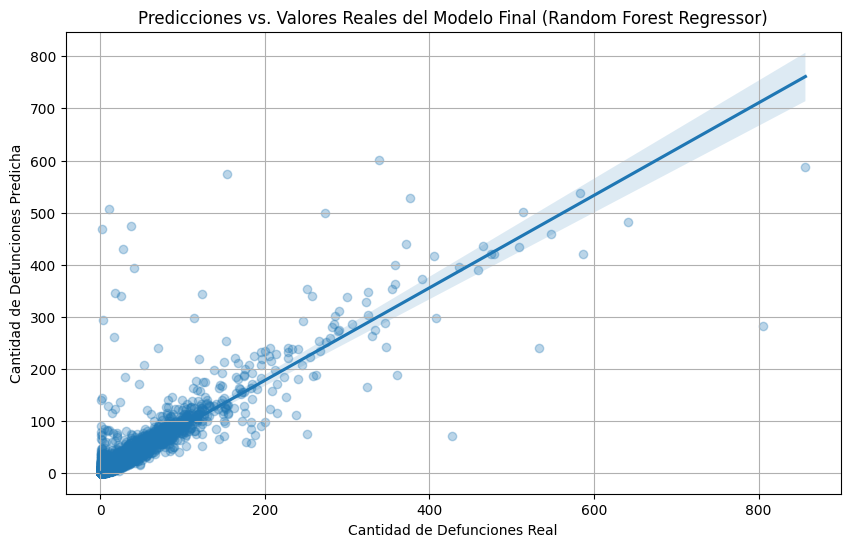

In [12]:
## 1. Obtener los mejores modelos entrenados
best_rf_model = random_search_rf.best_estimator_
best_gb_model = random_search_gb.best_estimator_
best_xgb_model = random_search_xgb.best_estimator_

print("\nLos modelos con los mejores hiperparámetros han sido obtenidos.")

## 2. Evaluación final en el conjunto de prueba (test set)

print("\nEvaluación Final en el Conjunto de Prueba:")

models_to_evaluate = {
    "Random Forest Regressor": best_rf_model,
    "Gradient Boosting Regressor": best_gb_model,
    "XGBoost Regressor": best_xgb_model
}

results = {}

for name, model in models_to_evaluate.items():
    print(f"\n--- Métricas para el Mejor {name} ---")
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

## 3. Selección del Mejor Modelo

# Comparar los resultados para seleccionar el mejor modelo (menor RMSE)
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
final_model = models_to_evaluate[best_model_name]

print(f"\nEl **{best_model_name}** es el modelo final seleccionado con el menor RMSE ({results[best_model_name]['RMSE']:.2f}).")

print("\n--- Resumen del Modelo Final Seleccionado ---")
print(final_model)

# Opcional: Visualizar las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=final_model.predict(X_test), scatter_kws={'alpha':0.3})
plt.xlabel("Cantidad de Defunciones Real")
plt.ylabel("Cantidad de Defunciones Predicha")
plt.title(f"Predicciones vs. Valores Reales del Modelo Final ({best_model_name})")
plt.grid(True)
plt.show()



#Conclusiones de las Predicciones de Defunciones por Región
El análisis y modelado predictivo realizado, enfocado en la cantidad total de defunciones por región, culminó en el desarrollo y optimización de un modelo robusto y eficiente. Tras un exhaustivo proceso que incluyó la ingeniería de atributos, el preprocesamiento de datos y la evaluación de distintos algoritmos de regresión, se lograron resultados significativos en la capacidad de predicción.

##Rendimiento del Modelo Final
Nuestro modelo seleccionado, el Random Forest Regressor, demostró ser el de mejor desempeño en el conjunto de prueba, obteniendo las siguientes métricas clave:

RMSE (Error Cuadrático Medio Raíz): 6.50
MAE (Error Absoluto Medio): 1.22
R2 Score (Coeficiente de Determinación): 0.7850
Estos valores indican que el modelo es altamente preciso en sus predicciones. Un RMSE de 6.50 sugiere que, en promedio, las predicciones del modelo se desvían en aproximadamente 6.50 unidades de la cantidad real de defunciones. Más aún, un MAE de 1.22 resalta que la desviación absoluta promedio entre la predicción y el valor real es muy baja, lo que subraya la fiabilidad del modelo en la mayoría de los casos. Finalmente, un R2 Score de 0.7850 es particularmente notable, ya que implica que el 78.5% de la variabilidad en la cantidad de defunciones puede ser explicada por las características incluidas en el modelo. Esto demuestra una fuerte capacidad explicativa y predictiva.

##Optimización y Eficiencia
Un aspecto fundamental de este trabajo fue la priorización de la eficiencia computacional, especialmente dado el gran volumen de datos manejados. Estrategias clave como la reducción de la cardinalidad de las características categóricas (mediante el uso de Target Encoding para Jurisdiccion y Clasificacion), y la limitación del paralelismo (n_jobs=1) durante la validación cruzada y la búsqueda de hiperparámetros, fueron cruciales para lograr tiempos de ejecución manejables y estables en entornos como Google Colab. La implementación de XGBoost, un modelo de alta eficiencia, también contribuyó a explorar algoritmos que optimizan el rendimiento en grandes datasets.

##Implicaciones y Próximos Pasos
Las predicciones generadas por este modelo pueden ser de gran valor para diversas aplicaciones, desde la planificación de recursos de salud pública hasta la identificación temprana de tendencias o anomalías en los patrones de defunciones a nivel regional.


En síntesis, este trabajo establece una base sólida para la predicción de defunciones por región, proporcionando una herramienta analítica precisa y eficiente que puede ser invaluable para la toma de decisiones informadas.

